In [38]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Load each dataset and drop NaN values
nifty_fmcg_data = pd.read_excel("/content/drive/MyDrive/Dataset/Nifty FMCG.xlsx").dropna()
gold_data = pd.read_excel("/content/drive/MyDrive/Dataset/Gold.xlsx").dropna()
nifty_bank_data = pd.read_excel("/content/drive/MyDrive/Dataset/Nifty Bank.xlsx").dropna()
nifty_midcap_100_data = pd.read_excel("/content/drive/MyDrive/Dataset/Nifty Midcap 100.xlsx").dropna()
nifty_pharma_data = pd.read_excel("/content/drive/MyDrive/Dataset/Nifty Pharma.xlsx").dropna()


# Display the first few rows of each dataset to inspect their structure
(nifty_fmcg_data.head(), gold_data.head(), nifty_bank_data.head(),
 nifty_midcap_100_data.head(), nifty_pharma_data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(        Date    Close    Change
 0 2022-08-12  42457.3 -0.049908
 1 2022-08-11  42478.5 -0.801231
 2 2022-08-10  42821.6 -0.365066
 3 2022-08-08  42978.5  0.110876
 4 2022-08-05  42930.9  0.234997,
         Date      Close    Change
 0 2022-08-11  142953.54  0.716361
 1 2022-08-10  141936.76 -0.639189
 2 2022-08-09  142849.84  0.611346
 3 2022-08-08  141981.84  0.858716
 4 2022-08-05  140773.00 -0.316266,
         Date     Close    Change
 0 2022-08-11  38879.85  1.546182
 1 2022-08-10  38287.85  0.131939
 2 2022-08-08  38237.40  0.835430
 3 2022-08-05  37920.60  0.437154
 4 2022-08-04  37755.55 -0.615174,
         Date     Close    Change
 0 2022-08-11  30583.85  0.873877
 1 2022-08-10  30318.90 -0.155272
 2 2022-08-08  30366.05  0.355935
 3 2022-08-05  30258.35  0.223578
 4 2022-08-04  30190.85  0.576994,
         Date     Close    Change
 0 2022-08-11  13014.20  0.490321
 1 2022-08-10  12950.70  0.080756
 2 2022-08-08  12940.25  0.003864
 3 2022-08-05  12939.75 -0.328138
 4 2022-08

In [39]:
# Standardizing date formats across all datasets
# Convert all date columns to datetime objects in a consistent format (YYYY-MM-DD)

nifty_fmcg_data['Date'] = pd.to_datetime(nifty_fmcg_data['Date'], errors='coerce')
gold_data['Date'] = pd.to_datetime(gold_data['Date'], errors='coerce', dayfirst=True)
nifty_bank_data['Date'] = pd.to_datetime(nifty_bank_data['Date'], errors='coerce')
nifty_midcap_100_data['Date'] = pd.to_datetime(nifty_midcap_100_data['Date'], errors='coerce')
nifty_pharma_data['Date'] = pd.to_datetime(nifty_pharma_data['Date'], errors='coerce')


# Check for missing values in each dataset
missing_values = {
    "NIFTY FMCG": nifty_fmcg_data.isnull().sum(),
    "Gold": gold_data.isnull().sum(),
    "NIFTY BANK": nifty_bank_data.isnull().sum(),
    "NIFTY MIDCAP 100": nifty_midcap_100_data.isnull().sum(),
    "NIFTY PHARMA": nifty_pharma_data.isnull().sum(),
}

missing_values

{'NIFTY FMCG': Date      0
 Close     0
 Change    0
 dtype: int64,
 'Gold': Date      0
 Close     0
 Change    0
 dtype: int64,
 'NIFTY BANK': Date      0
 Close     0
 Change    0
 dtype: int64,
 'NIFTY MIDCAP 100': Date      0
 Close     0
 Change    0
 dtype: int64,
 'NIFTY PHARMA': Date      0
 Close     0
 Change    0
 dtype: int64}

In [ ]:
# Standardize date formats across all datasets
date_cols = ['Date']
date_format = '%Y-%m-%d'
for dataset in [nifty_fmcg_data, gold_data, nifty_bank_data, nifty_midcap_100_data, nifty_pharma_data]:
    for col in date_cols:
        dataset[col] = pd.to_datetime(dataset[col], errors='coerce')

# Handling missing values for Gold's "Percentage Change" using forward fill
gold_data['Change'].fillna(method='ffill', inplace=True)

# Align datasets by date to ensure they cover the same date range
common_start_date = max(nifty_fmcg_data['Date'].min(), gold_data['Date'].min(), nifty_bank_data['Date'].min(),
                        nifty_midcap_100_data['Date'].min(), nifty_pharma_data['Date'].min())
common_end_date = min(nifty_fmcg_data['Date'].max(), gold_data['Date'].max(), nifty_bank_data['Date'].max(),
                      nifty_midcap_100_data['Date'].max(), nifty_pharma_data['Date'].max())

# Print common start and end dates to see the overlapping period for all datasets
common_start_date, common_end_date


C:\Users\USER\AppData\Local\Temp\ipykernel_12096\3628326363.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gold_data['Change'].fillna(method='ffill', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12096\3628326363.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gold_data['Change'].fillna(method='ffill', inplace=True)


(Timestamp('2001-01-01 00:00:00'), Timestamp('2022-08-11 00:00:00'))

In [ ]:
nifty_bank_data['Daily Return'] = nifty_bank_data['Change']
nifty_midcap_100_data['Daily Return'] = nifty_midcap_100_data['Change']
nifty_pharma_data['Daily Return'] = nifty_pharma_data['Change']
nifty_fmcg_data['Daily Return'] = nifty_fmcg_data['Change']
gold_data['Daily Return'] = gold_data['Change']

# Display the head of each dataset to confirm the daily returns calculation
(nifty_bank_data[['Date', 'Daily Return']].head(),
 nifty_midcap_100_data[['Date', 'Daily Return']].head(),
 nifty_pharma_data[['Date', 'Daily Return']].head(),
 nifty_fmcg_data[['Date', 'Daily Return']].head(),
 gold_data[['Date', 'Daily Return']].head())

(        Date  Daily Return
 0 2001-01-01      0.000000
 1 2001-01-02      3.861178
 2 2001-01-03      2.756720
 3 2001-01-04     -0.871898
 4 2001-01-05      1.188865,
         Date  Daily Return
 0 2001-01-01      0.000000
 1 2001-01-02      0.958439
 2 2001-01-03      1.009752
 3 2001-01-04     -0.734792
 4 2001-01-05      0.413152,
         Date  Daily Return
 0 2001-01-01      0.000000
 1 2001-01-02     -2.690000
 2 2001-01-03      0.142842
 3 2001-01-04     -0.785026
 4 2001-01-05      2.014811,
         Date  Daily Return
 0 2001-01-01      0.000000
 1 2001-01-02      0.280357
 2 2001-01-03      1.561252
 3 2001-01-04      1.412126
 4 2001-01-05     -0.472380,
         Date  Daily Return
 0 2001-01-01      0.000000
 1 2001-01-02     -1.220637
 2 2001-01-03     -1.425309
 3 2001-01-04      0.013383
 4 2001-01-05      0.090864)

In [ ]:
# Calculate average annual return and annualized volatility for each asset

# Define the number of trading days in a year, typically around 252 for the stock market
trading_days = 252

# Calculate average annual return (mean of daily returns * trading days)
avg_annual_return = {
    "NIFTY BANK": nifty_bank_data['Daily Return'].mean() * trading_days,
    "NIFTY MIDCAP 100": nifty_midcap_100_data['Daily Return'].mean() * trading_days,
    "NIFTY PHARMA": nifty_pharma_data['Daily Return'].mean() * trading_days,
    "NIFTY FMCG": nifty_fmcg_data['Change'].mean() * trading_days,
    "Gold": gold_data['Daily Return'].mean() * trading_days
}

# Calculate annualized volatility (standard deviation of daily returns * sqrt(trading days))
annualized_volatility = {
    "NIFTY BANK": nifty_bank_data['Daily Return'].std() * (trading_days ** 0.5),
    "NIFTY MIDCAP 100": nifty_midcap_100_data['Daily Return'].std() * (trading_days ** 0.5),
    "NIFTY PHARMA": nifty_pharma_data['Daily Return'].std() * (trading_days ** 0.5),
    "NIFTY FMCG": nifty_fmcg_data['Daily Return'].std() * (trading_days ** 0.5),
    "Gold": gold_data['Daily Return'].std() * (trading_days ** 0.5)
}

avg_annual_return, annualized_volatility

({'NIFTY BANK': 21.623089209949175,
  'NIFTY MIDCAP 100': 17.957419649054984,
  'NIFTY PHARMA': 14.124871695874427,
  'NIFTY FMCG': 14.87124211820576,
  'Gold': 12.216718626604674},
 {'NIFTY BANK': 29.4900137829807,
  'NIFTY MIDCAP 100': 22.552688318753383,
  'NIFTY PHARMA': 20.450961891481032,
  'NIFTY FMCG': 20.15968362082039,
  'Gold': 16.94662036272774})

Defining the trading environment. This environment will interact with the DRL agent by providing states, accepting actions, and returning rewards based on the performance of those actions.

In [ ]:
!pip install gym

In [ ]:
import gym
import numpy as np
import pandas as pd
from gym import spaces


class TradingEnv(gym.Env):
    def __init__(self, historical_data, initial_balance=10000):
        super().__init__()
        self.historical_data = historical_data
        self.initial_balance = initial_balance
        self.n_assets = len(historical_data.columns)
        self.current_step = 0
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(2 * self.n_assets,), dtype=np.float32)
        self.reset()

    def reset(self):
        self.current_step = 0
        self.current_date = self.historical_data.index[self.current_step]
        self.portfolio_allocations = np.array([1.0 / self.n_assets] * self.n_assets)
        self.portfolio_value = self.initial_balance
        return self._construct_state()


    def _construct_state(self):
        # Simplified state includes historical returns
        historical_returns = self.historical_data.iloc[self.current_step].values
        state = np.concatenate([historical_returns, self.portfolio_allocations])
        return state

    def step(self, action):
        action = self._normalize_action(action)
        prev_portfolio_value = self.portfolio_value
        self.portfolio_value = self._calculate_portfolio_value(action)
        reward = self.portfolio_value - prev_portfolio_value
        self.current_step += 1
        done = self.current_step >= len(self.historical_data) - 1
        self.current_date = self.historical_data.index[min(self.current_step, len(self.historical_data) - 1)]

        # Call render() method after each step
        self.render()

        # Construct the state with the correct shape
        state = self._construct_state()
        return state, reward, done, {}

    def _normalize_action(self, action):
        normalized_action = np.clip(action, 0, 1)
        normalized_action /= np.sum(normalized_action)
        return normalized_action

    def _calculate_portfolio_value(self, action):
        asset_prices = self.historical_data.iloc[self.current_step, :self.n_assets].values
        self.portfolio_allocations = action
        return np.dot(asset_prices, action) * self.portfolio_value

    def render(self, mode='human'):
        print(f"Step: {self.current_step}")
        print(f"Date: {self.current_date}")
        print(f"Allocations: {self.portfolio_allocations}")

In [ ]:
!pip install stable-baselines3

In [ ]:
from stable_baselines3 import DDPG, PPO
from stable_baselines3.common.noise import NormalActionNoise
import numpy as np
from stable_baselines3.common.policies import ActorCriticPolicy
from torch.nn import BatchNorm1d


class DRLAgent:
    """A DRL agent for portfolio management using DDPG or PPO."""

    def __init__(self, env, algorithm='DDPG',noise_decay=0.99, noise_sigma=0.1):
        self.env = env
        self.algorithm = algorithm
        self.noise_decay = noise_decay
        self.noise_sigma = noise_sigma

        # Define the action noise for DDPG
        self.n_actions = env.action_space.shape[-1]
        self.action_noise = NormalActionNoise(mean=np.zeros(self.n_actions), sigma=self.noise_sigma * np.ones(self.n_actions))

        # Initialize the model based on the selected algorithm
        policy_kwargs = dict(net_arch=dict(pi=[128, 128], qf=[400, 300]))
        if algorithm == 'DDPG':
            self.model = DDPG("MlpPolicy", env, action_noise=self.action_noise, verbose=1, learning_rate=0.001, policy_kwargs=policy_kwargs)
        elif algorithm == 'PPO':
            self.model = PPO("MlpPolicy", env, verbose=1)
        else:
            raise ValueError("Unsupported algorithm. Choose 'DDPG' or 'PPO'.")

    def train(self, total_timesteps=10000):
        """Train the agent."""
        self.model.learn(total_timesteps=total_timesteps)
        # Reduce the noise after training
        self.noise_sigma *= self.noise_decay
        self.action_noise = NormalActionNoise(mean=np.zeros(self.n_actions), sigma=self.noise_sigma * np.ones(self.n_actions))

    def act(self, observation):
        """Determine the action based on the current observation."""
        action, _states = self.model.predict(observation, deterministic=True)
        return action

    def save(self, path):
        """Save the model."""
        self.model.save(path)

    def load(self, path):
        """Load the model."""
        self.model = self.model.load(path)

In [ ]:
# Ensure no NaN values remain in the datasets
assert not nifty_fmcg_data.isnull().any().any(), "NaN values found in nifty_fmcg_data"
assert not gold_data.isnull().any().any(), "NaN values found in gold_data"
assert not nifty_bank_data.isnull().any().any(), "NaN values found in nifty_bank_data"
assert not nifty_midcap_100_data.isnull().any().any(), "NaN values found in nifty_midcap_100_data"
assert not nifty_pharma_data.isnull().any().any(), "NaN values found in nifty_pharma_data"

In [ ]:
# After confirming datasets are clean, prepare the combined historical data DataFrame
historical_data = pd.concat([
    nifty_fmcg_data.set_index('Date')['Daily Return'].rename('Nifty_Fmcg'),
    gold_data.set_index('Date')['Daily Return'].rename('Gold'),
    nifty_bank_data.set_index('Date')['Daily Return'].rename('Nifty_Bank'),
    nifty_midcap_100_data.set_index('Date')['Daily Return'].rename('Nifty_Midcap_100'),
    nifty_pharma_data.set_index('Date')['Daily Return'].rename('Nifty_Pharma')
], axis=1, join='inner')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# Assuming all asset data have been loaded into pandas DataFrames

def safe_set_index(df, column_name='Date'):
    if column_name in df.columns:
        df[column_name] = pd.to_datetime(df[column_name])  # Ensure the 'Date' column is of datetime type
        df.set_index(column_name, inplace=True)

# Apply safe_set_index to all data frames
safe_set_index(nifty_fmcg_data)
safe_set_index(gold_data)
safe_set_index(nifty_bank_data)
safe_set_index(nifty_midcap_100_data)
safe_set_index(nifty_pharma_data)

# Combine the 'Close' prices into a single DataFrame
historic_data = pd.concat(
    [
        nifty_fmcg_data[['Close']].rename(columns={'Close': 'Nifty_Fmcg'}),
        gold_data[['Close']].rename(columns={'Close': 'Gold'}),
        nifty_bank_data[['Close']].rename(columns={'Close': 'Nifty_Bank'}),
        nifty_midcap_100_data[['Close']].rename(columns={'Close': 'Nifty_Midcap_100'}),
        nifty_pharma_data[['Close']].rename(columns={'Close': 'Nifty_Pharma'})
    ],
    axis=1,
    join='inner'  # Aligns on the index, ensuring only dates present in all DataFrames are included
)

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(historic_data)

# Convert the normalized array back to a DataFrame
historical_data = pd.DataFrame(normalized_data, columns=historic_data.columns, index=historic_data.index)

# Fill any NaN values that might result from the concatenation
# Forward fill carries forward the last known value, and backfill fills backwards
historical_data.fillna(method='ffill', inplace=True)
historical_data.fillna(method='bfill', inplace=True)  # In case the first rows contain NaN


print(historical_data.head())
print(historical_data.isnull().any())




            Nifty_Fmcg      Gold  Nifty_Bank  Nifty_Midcap_100  Nifty_Pharma
Date                                                                        
2001-01-01    0.021010  0.006062    0.005784          0.016708      0.017835
2001-01-02    0.021197  0.004983    0.006717          0.017049      0.015922
2001-01-03    0.022243  0.003740    0.007408          0.017411      0.016021
2001-01-04    0.023205  0.003751    0.007184          0.017145      0.015477
2001-01-05    0.022878  0.003829    0.007487          0.017293      0.016862
Nifty_Fmcg          False
Gold                False
Nifty_Bank          False
Nifty_Midcap_100    False
Nifty_Pharma        False
dtype: bool


C:\Users\USER\AppData\Local\Temp\ipykernel_12096\2284355706.py:40: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_data.fillna(method='ffill', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12096\2284355706.py:41: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  historical_data.fillna(method='bfill', inplace=True)  # In case the first rows contain NaN


In [ ]:
historical_data

,Nifty_Fmcg,Gold,Nifty_Bank,Nifty_Midcap_100,Nifty_Pharma
Date,,,,,
2001-01-01,0.021010,0.006062,0.005784,0.016708,0.017835
2001-01-02,0.021197,0.004983,0.006717,0.017049,0.015922
2001-01-03,0.022243,0.003740,0.007408,0.017411,0.016021
2001-01-04,0.023205,0.003751,0.007184,0.017145,0.015477
2001-01-05,0.022878,0.003829,0.007487,0.017293,0.016862
...,...,...,...,...,...
2022-08-04,0.996393,0.891252,0.913995,0.916535,0.869870
2022-08-05,0.998842,0.888173,0.918071,0.918626,0.866841
2022-08-08,1.000000,0.896507,0.925894,0.921963,0.866876


In [ ]:
!pip install shimmy

In [ ]:
# 'historical_data' is a DataFrame that includes the historical prices for the assets
# It must be preprocessed to align the dates and include only relevant columns before this step
import numpy as np
import pandas as pd
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from gym import spaces


# Create the environment
env = TradingEnv(historical_data, initial_balance=10000)

# Initialize the DRL agent
agent = DRLAgent(env, algorithm='DDPG')
print(env.observation_space)

# Train the agent
agent.train(total_timesteps=5000)

# Save the trained model
agent.save("ddpg_portfolio_management")
# If needed, you can load the model from the file
agent.load("ddpg_portfolio_management")

# Reset the environment to get the initial state and use the agent to decide the action
observation = env.reset()
action = agent.act(observation)
print("Action taken:", action)

In [5]:
#Results_on_test_data

nifty_fmcg_test_data = pd.read_excel("/content/drive/MyDrive/Test Dataset/Nifty_FMCG.xlsx")
gold_test_data = pd.read_excel("/content/drive/MyDrive/Test Dataset/Gold.xlsx")
nifty_bank_test_data = pd.read_excel("/content/drive/MyDrive/Test Dataset/Nifty_Bank.xlsx")
nifty_midcap_100_test_data = pd.read_excel("/content/drive/MyDrive/Test Dataset/Nifty_Midcap_100.xlsx")
nifty_pharma_test_data = pd.read_excel("/content/drive/MyDrive/Test Dataset/Nifty_Pharma.xlsx")

In [6]:
nifty_fmcg_test_data['Date'] = pd.to_datetime(nifty_fmcg_test_data['Date'], errors='coerce')
gold_test_data['Date'] = pd.to_datetime(gold_test_data['Date'], errors='coerce', dayfirst=True)
nifty_bank_test_data['Date'] = pd.to_datetime(nifty_bank_test_data['Date'], errors='coerce')
nifty_midcap_100_test_data['Date'] = pd.to_datetime(nifty_midcap_100_test_data['Date'], errors='coerce')
nifty_pharma_test_data['Date'] = pd.to_datetime(nifty_pharma_test_data['Date'], errors='coerce')


In [7]:
nifty_fmcg_test_data['Price'] = pd.to_numeric(nifty_fmcg_test_data['Price'])
gold_test_data['Price'] = pd.to_numeric(gold_test_data['Price'])
nifty_bank_test_data['Price'] = pd.to_numeric(nifty_bank_test_data['Price'])
nifty_midcap_100_test_data['Price'] = pd.to_numeric(nifty_midcap_100_test_data['Price'])
nifty_pharma_test_data['Price'] = pd.to_numeric(nifty_pharma_test_data['Price'])

In [8]:
nifty_fmcg_test_data.set_index('Date', inplace=True)
gold_test_data.set_index('Date', inplace=True)
nifty_bank_test_data.set_index('Date', inplace=True)
nifty_midcap_100_test_data.set_index('Date', inplace=True)
nifty_pharma_test_data.set_index('Date', inplace=True)

In [9]:
portfolio = 0.01088466*nifty_fmcg_test_data['Price'] + 0.33425966 * gold_test_data['Price'] + 0.02417764 * nifty_bank_test_data['Price'] + 0.32040453 * nifty_midcap_100_test_data['Price'] + 0.31027353 * nifty_pharma_test_data['Price']

In [10]:
portfolio.dropna()

Date
2022-08-12    15874.785145
2022-08-16    16041.726965
2022-08-17    16107.281350
2022-08-18    16118.169677
2022-08-19    15904.928275
                  ...     
2024-04-04    24389.610074
2024-04-05    24516.007026
2024-04-08    24544.429099
2024-04-09    24489.829794
2024-04-10    24633.901209
Name: Price, Length: 408, dtype: float64

In [11]:
pip install quantstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.4 MB/s eta 0:00:00


In [12]:
import quantstats as qs
qs.stats.sharpe(portfolio)

2.2970471731225794

In [13]:
stock = qs.utils.download_returns('^NSEI')
stock=stock.loc["2022-08-12" : "2024-04-05"]

[*********************100%%**********************]  1 of 1 completed


[Performance Metrics]

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2022-08-16   2022-08-16
End Period                 2024-04-10   2024-04-10
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          27.21%       55.18%
CAGR﹪                     10.58%       20.16%

Sharpe                     1.4          2.4
Prob. Sharpe Ratio         96.13%       99.78%
Smart Sharpe               1.32         2.27
Sortino                    2.06         3.37
Smart Sortino              1.95         3.19
Sortino/√2                 1.46         2.39
Smart Sortino/√2           1.38         2.26
Omega                      1.49         1.49

Max Drawdown               -9.93%       -9.06%
Longest DD Days            196          161
Volatility (ann.)          11.1%        11.65%
R^2                        0.59         0.59
Information Ratio          0.1          0.1

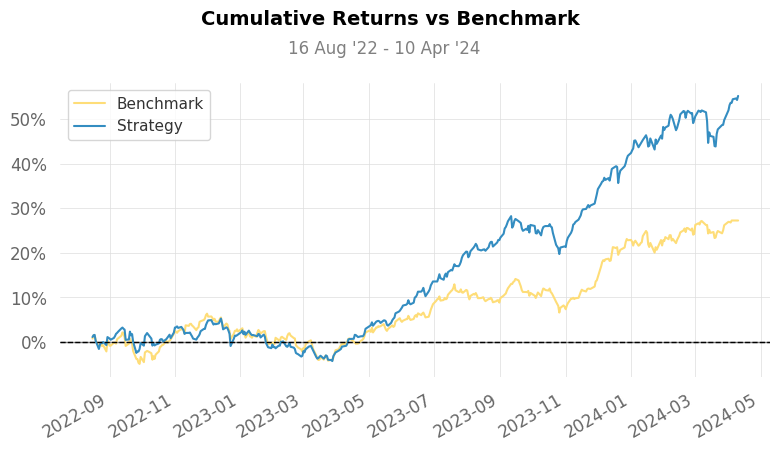

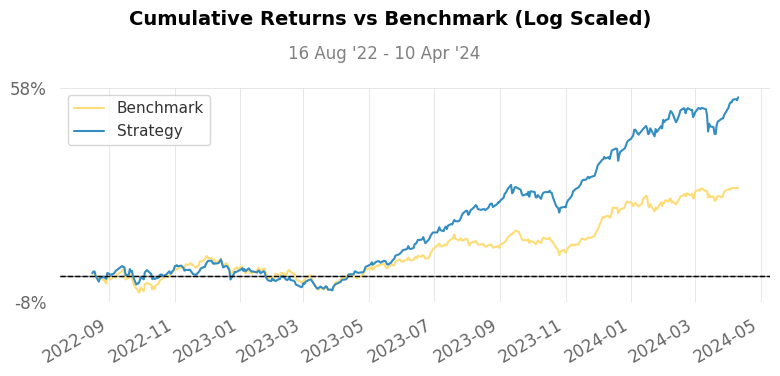

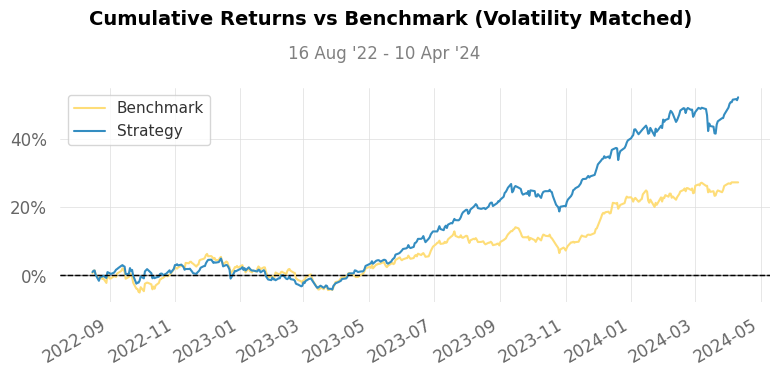

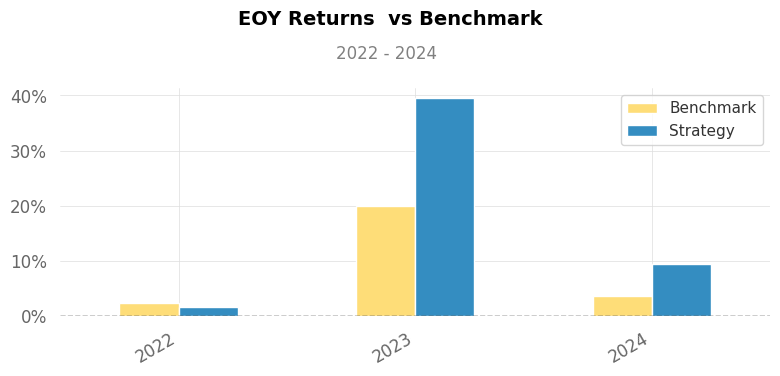

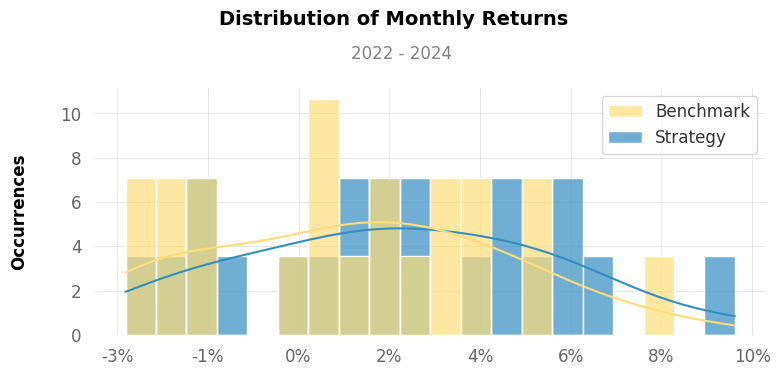

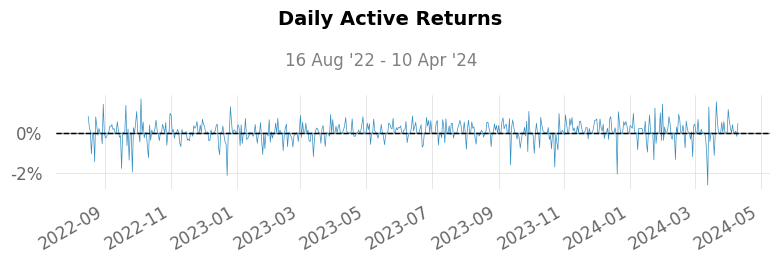

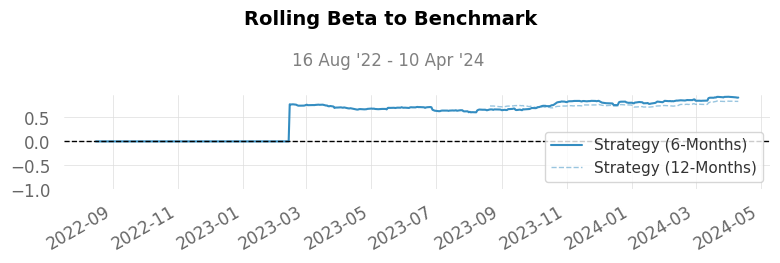

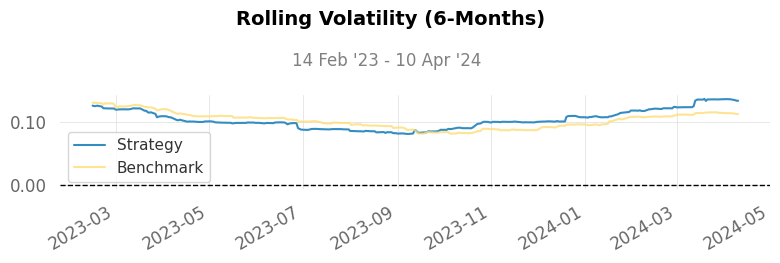

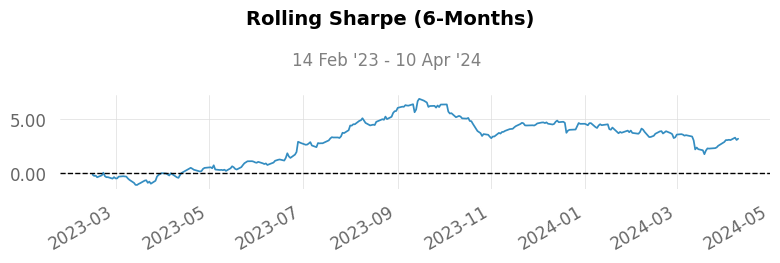

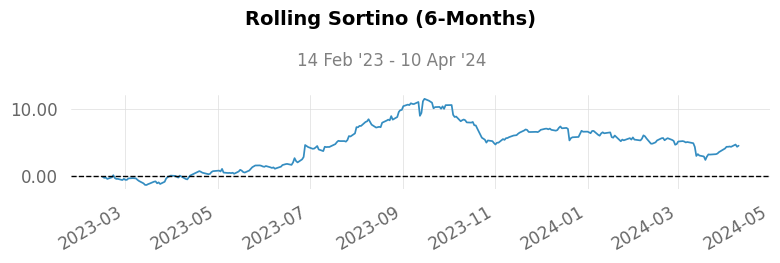

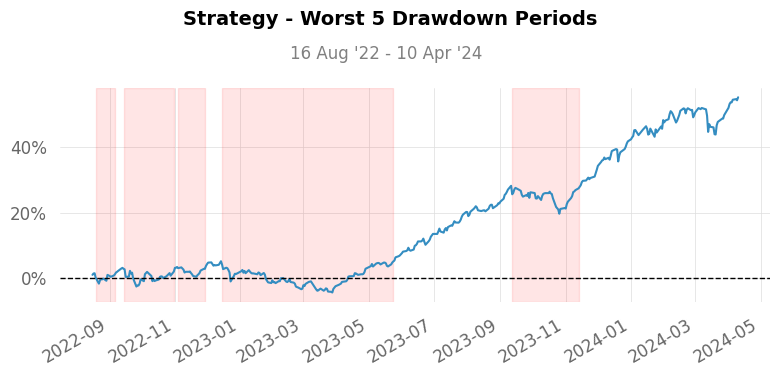

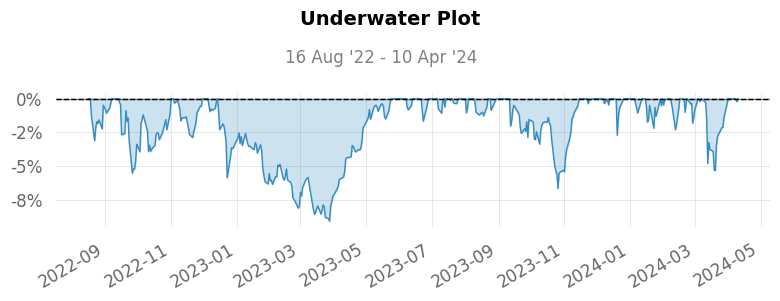

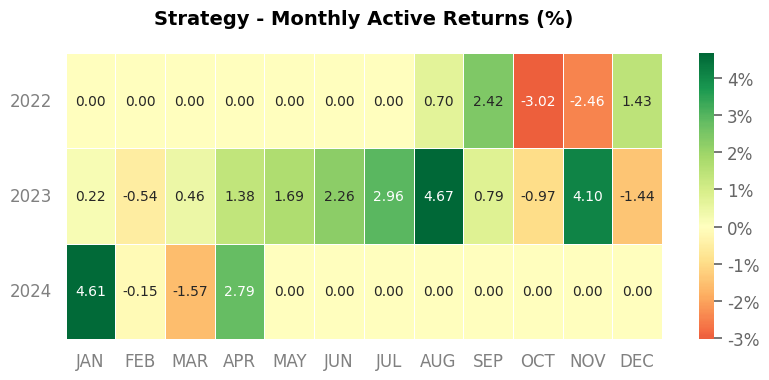

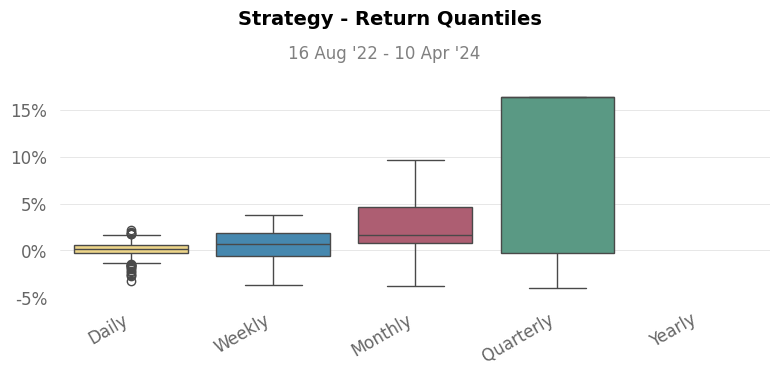

In [14]:
qs.reports.full(portfolio,stock)